In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
import sys
sys.path.append("../")

import utils as ut

In [3]:
meta_file = "/data5/deepro/starrseq/data/meta_data/metadata.json"
all_lib_names = ["input", "control", "atf2", "ctcf", "foxa1", "lef1", "scrt1", "tcf7l2", "16p12.1"]
store_dir = "/data5/deepro/starrseq/main_library/2_quality_control_lib/data/"

In [4]:
def read_and_extract_coverage(cov_bed):
    df = pd.read_csv(cov_bed, sep="\t", header=None)
    roi_depth = df.iloc[:, -4]
    return roi_depth

def get_lib_depth_beds_filepaths(store_dir, lib_short, lib_prefix, lib_reps):
    depth_beds = [ut.get_depth_bed_filepaths(store_dir, lib_short, lib_prefix, lib_rep) for lib_rep in lib_reps.split()]
    return depth_beds

def plot_read_histogram(beds, ax):
    df = pd.concat(list(map(read_and_extract_coverage, beds)), axis=1)
    df.columns = [f"Rep {i}" for i in range(1, len(beds)+1)]
    percent_regions_gt_50_reads = int((((df>50).sum()/len(df)).min())*100)
    bins = list(np.linspace(0, 2000, 70))
    sns_ax = sns.histplot(data = df, bins=bins, ax=ax, legend=False)
    return sns_ax, percent_regions_gt_50_reads

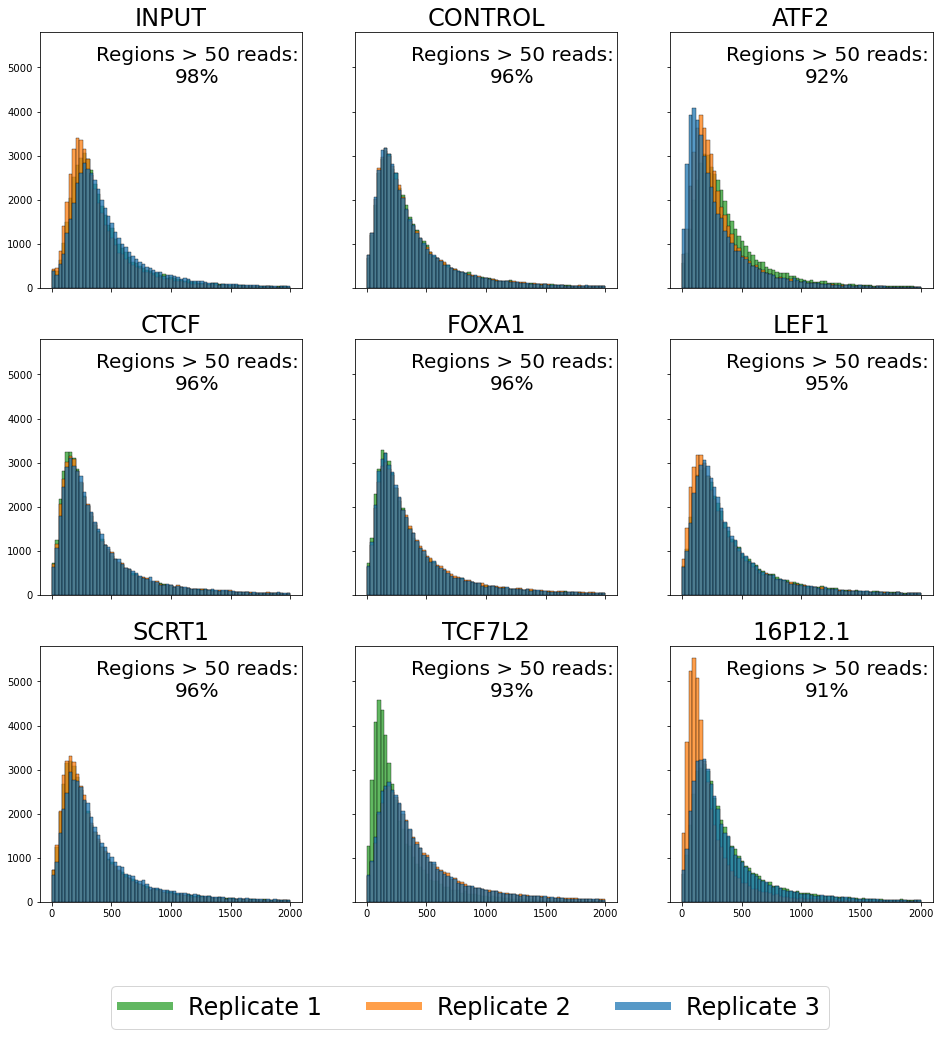

In [6]:
## create the subplot figure
all_lib_names_arr = np.array(all_lib_names).reshape(3,3)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,16), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        lib_name = all_lib_names_arr[i, j]
        lib_args = ut.create_args(meta_file, lib_name)
        lib_beds = get_lib_depth_beds_filepaths(store_dir, lib_args.library_short, lib_args.library_prefix, lib_args.library_reps)
        sns_ax, per_gt_50 = plot_read_histogram(lib_beds, axes[i][j])
        sns_ax.set_title(lib_name.upper(), fontsize=24)
        sns_ax.set_ylabel("")
        # sns_ax.set_yticklabels([])
        # sns_ax.set_xticklabels([])
        axes[i][j].annotate(f"Regions > 50 reads:\n{per_gt_50}%", xy=(0.6,0.8), xycoords='axes fraction', ha='center', fontsize=20)

cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 0.75), lw=8),
                Line2D([0], [0], color=(1.0, 0.4980392156862745, 0.054901960784313725, 0.75), lw=8),
                Line2D([0], [0], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.75), lw=8)]

fig.legend(custom_lines, ["Replicate 1", "Replicate 2", "Replicate 3"], loc="lower center", ncol=3, fontsize=24)